# CHAPTER 5: SAMPLING AND ESTIMATION (CONFIDENCE INTERVALS)
**(Week 9-10: Lecture Notes)**

---

## 1. INTRODUCTION: THE GAME CHANGES
In the first half of the course (Probability), we did this:
*   "If the factory error rate is 5% (Truth is known), what is the probability that 2 out of 10 parts I select are defective?"

Now (Statistics), we will do this:
*   "2 out of 10 parts I selected turned out to be defective (Data is in hand). **What is the real error rate of the factory?**"

**Our Goal:** To go from the Part to the Whole (From Sample to Population).


## 2. CENTRAL LIMIT THEOREM (CLT) - The "Magic Wand"
**The Problem:** Not all data in nature follows a Normal (Bell Curve) distribution. Some are skewed, some are flat (Uniform). How do we analyze non-normal data?

**The Solution (CLT):** If you take repeated samples from a population (whatever its shape) and calculate their **Means ($\bar{x}$)**, the distribution of these means will follow a **NORMAL DISTRIBUTION**.

**Condition:** The sample size ($n$) must be large enough (Generally accepted as $n \ge 30$).

### 2.1. Engineering Meaning
This theorem tells us: *"Even if the strength of the rebar does not follow a normal distribution, the average of 50 samples you take from those bars distributes Normally. Therefore, you can use the Z-Table with peace of mind."*


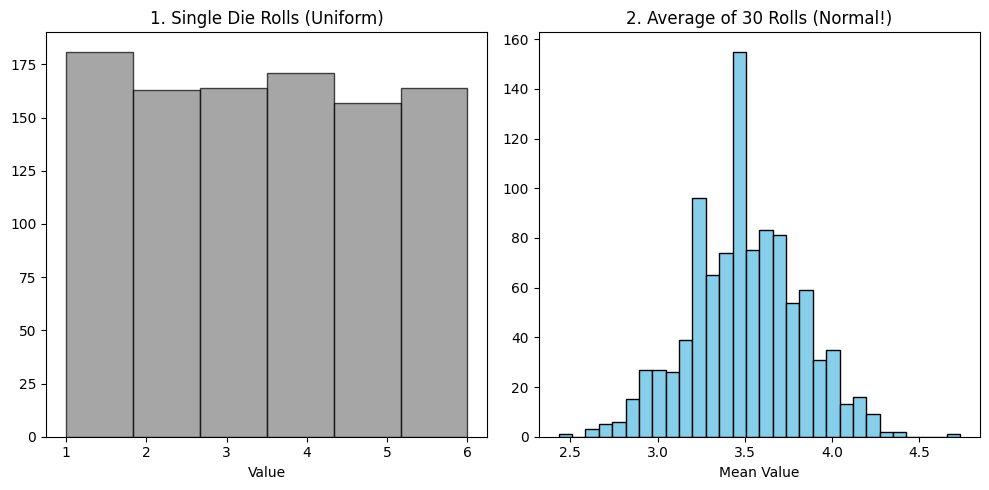

In [1]:
import random
import matplotlib.pyplot as plt

# --- VISUAL PROOF OF CLT ---
# Let's simulate rolling a die (Uniform Distribution - Not Normal)
# But we look at the AVERAGE of 30 rolls.

population_data = [1, 2, 3, 4, 5, 6] # A die
sample_means = []

# Do this experiment 1000 times
for _ in range(1000):
    # Roll the die 30 times (n=30)
    sample = [random.choice(population_data) for _ in range(30)]
    # Calculate the mean
    mean_val = sum(sample) / 30
    sample_means.append(mean_val)

# Plotting
plt.figure(figsize=(10, 5))

# 1. Original Distribution (Theoretical)
plt.subplot(1, 2, 1)
plt.hist([random.choice(population_data) for _ in range(1000)], bins=6, color='gray', edgecolor='black', alpha=0.7)
plt.title("1. Single Die Rolls (Uniform)")
plt.xlabel("Value")

# 2. Distribution of Means (CLT Effect)
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.title("2. Average of 30 Rolls (Normal!)")
plt.xlabel("Mean Value")

plt.tight_layout()
plt.show()


## 3. SAMPLING DISTRIBUTION
A single measurement is not the same as the "Measurement of the Mean".

### Important Formula Change (Standard Error)
For the mean ($\bar{x}$) of samples with $n$ elements:
1.  **Mean of Means:** $\mu_{\bar{x}} = \mu$ (Same as population).
2.  **Standard Deviation of Means (Standard Error):**
$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $$

**Critical Interpretation:** As the sample size ($n$) increases, the Standard Error decreases. That is, the "deviation of the average" is much smaller than the "deviation of a single datum".

---

### 3.1. Numerical Example (Elevator Capacity)
Let people's weight be normally distributed with mean $\mu = 70$ kg and standard deviation $\sigma = 20$ kg.

#### Question 1:
What is the probability of **1 randomly selected person** being heavier than **80 kg**?
*   **Solution:**
    *   $Z = \frac{80 - 70}{20} = 0.5$
    *   From Table (Z=0.5): Probability is high (approx 31% chance).

#### Question 2:
What is the probability of the **AVERAGE of 16 randomly selected people** being heavier than **80 kg**?
*   **Solution:**
    *   Here $n=16$. We must update the deviation!
    *   New Deviation (Standard Error) = $\frac{20}{\sqrt{16}} = \frac{20}{4} = 5$.
    *   New Z Score = $\frac{80 - 70}{5} = \mathbf{2.0}$
    *   From Table (Z=2.0): Probability is very low (approx 2% chance).

**Conclusion:** It is normal for 1 person to be heavy, but it is very rare for the average of 16 people to be that heavy.


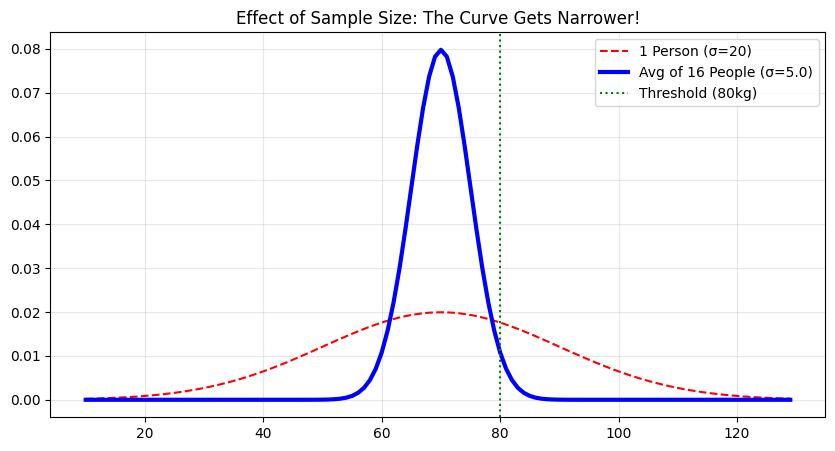

In [2]:
import math
import matplotlib.pyplot as plt

# Function for Normal Distribution Curve
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma)**2)

# Parameters
mu = 70
sigma_population = 20
n = 16
sigma_sample = sigma_population / math.sqrt(n) # Standard Error = 5

# Data for plotting
x_values = [i for i in range(10, 130)]
y_pop = [normal_pdf(x, mu, sigma_population) for x in x_values]
y_sample = [normal_pdf(x, mu, sigma_sample) for x in x_values]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_pop, color='red', linestyle='--', label=f'1 Person (σ={sigma_population})')
plt.plot(x_values, y_sample, color='blue', linewidth=3, label=f'Avg of 16 People (σ={sigma_sample})')

plt.title("Effect of Sample Size: The Curve Gets Narrower!")
plt.axvline(x=80, color='green', linestyle=':', label='Threshold (80kg)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 4. ESTIMATION THEORY
It is the job of guessing the truth (Population Parameter) with the data we have.

### 4.1. Point Estimation
We assign a "single number".
*   Best estimator for $\mu$ $\rightarrow$ Sample Mean ($\bar{x}$).
*   **Risk:** Making a point shot is hard. You will likely be slightly off.

### 4.2. Interval Estimation (Confidence Interval)
Instead of a point shot, we cast a "Net". We say *"The average is between 45 and 55, and I am 95% sure of this."*


## 5. CONFIDENCE INTERVAL (Case 1: $\sigma$ Known)
If we know the population $\sigma$ (or $n \ge 30$), we use the **Z-Table**.

### 5.1. Formula
$$ \bar{x} \pm \left[ Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \right] $$
*   **Margin of Error (E):** The part inside the brackets.

### 5.2. Critical Z Values (Memorize These)
*   **90%:** $Z = 1.645$
*   **95%:** $Z = 1.96$ (Most famous)
*   **99%:** $Z = 2.575$

---

### 5.3. Numerical Example (Production Line)
**Problem:** Screw diameters. $\sigma = 0.1$ mm. Sample $n = 36$, mean $\bar{x} = 10.5$ mm. Find **95% Confidence Interval**.

**Solution:**
1.  **Find Z:** For 95%, $Z = 1.96$.
2.  **Calculate Standard Error:** $\frac{0.1}{\sqrt{36}} = \frac{0.1}{6} \approx 0.0167$
3.  **Calculate Margin of Error (E):** $1.96 \times 0.0167 \approx 0.033$
4.  **Find Interval:**
    *   Lower: $10.5 - 0.033 = \mathbf{10.467}$
    *   Upper: $10.5 + 0.033 = \mathbf{10.533}$

**Result:** We are 95% confident that the true mean is between **10.467 mm** and **10.533 mm**.


In [3]:
# Z-Interval Calculator Code
import math

x_bar = 10.5
sigma = 0.1
n = 36
z_95 = 1.96

std_error = sigma / math.sqrt(n)
margin_of_error = z_95 * std_error

lower = x_bar - margin_of_error
upper = x_bar + margin_of_error

print(f"--- Screw Problem Verification ---")
print(f"Standard Error: {std_error:.5f}")
print(f"Margin of Error: {margin_of_error:.5f}")
print(f"Result: [{lower:.3f}, {upper:.3f}]")


--- Screw Problem Verification ---
Standard Error: 0.01667
Margin of Error: 0.03267
Result: [10.467, 10.533]


## 6. CONFIDENCE INTERVAL (Case 2: $\sigma$ Unknown)
If we don't know $\sigma$, we use the sample deviation ($s$) and the **T-Table**.

### 6.1. Why T-Distribution?
It has **thicker tails** than Normal. Because using $s$ instead of $\sigma$ adds uncertainty, we need a wider net (wider interval) to be safe.

### 6.2. Formula
$$ \bar{x} \pm \left[ t_{(\alpha/2, n-1)} \cdot \frac{s}{\sqrt{n}} \right] $$
*   **df (Degrees of Freedom):** $n-1$

---

### 6.3. Numerical Example (Concrete Strength)
**Problem:** $n = 10$ samples. Mean $\bar{x} = 30$ MPa, Std Dev $s = 4$ MPa. Find **95% Confidence Interval**.

**Solution:**
1.  **Find T-Value:**
    *   $df = 10 - 1 = 9$.
    *   $\alpha = 0.05$ (Two-tailed).
    *   From T-Table (Row 9, Col 0.025): **$t = 2.262$**
2.  **Calculate Standard Error:** $\frac{4}{\sqrt{10}} \approx 1.265$
3.  **Calculate Margin of Error (E):** $2.262 \times 1.265 \approx 2.86$
4.  **Find Interval:**
    *   Lower: $30 - 2.86 = \mathbf{27.14}$
    *   Upper: $30 + 2.86 = \mathbf{32.86}$

**Result:** We are 95% confident the concrete strength is between **27.14 MPa** and **32.86 MPa**.


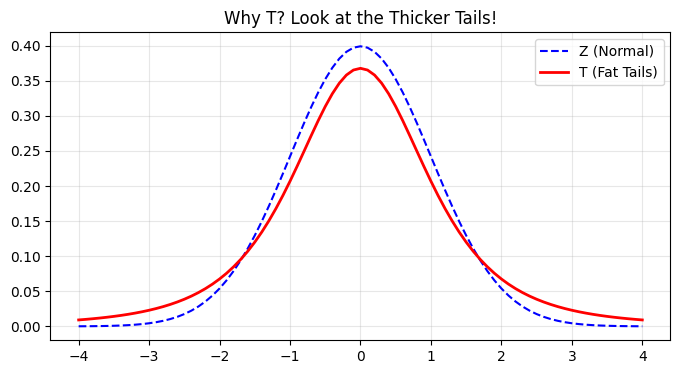

--- Concrete Problem Verification ---
Margin of Error: 2.86
Interval: [27.14, 32.86]


In [4]:
# Visualizing T vs Z
# Note: T has fat tails!
def t_pdf(x, df):
    # Simplified math for T-dist shape (Student's t)
    numerator = math.gamma((df + 1) / 2)
    denominator = math.sqrt(df * math.pi) * math.gamma(df / 2)
    base = (1 + (x**2) / df)
    exponent = -(df + 1) / 2
    return (numerator / denominator) * (base ** exponent)

x_vals = [i * 0.1 for i in range(-40, 41)]
z_y = [normal_pdf(x, 0, 1) for x in x_vals]
t_y = [t_pdf(x, df=3) for x in x_vals]

plt.figure(figsize=(8, 4))
plt.plot(x_vals, z_y, 'b--', label='Z (Normal)')
plt.plot(x_vals, t_y, 'r-', linewidth=2, label='T (Fat Tails)')
plt.title("Why T? Look at the Thicker Tails!")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Concrete Verification ---
x_bar_conc = 30
s_conc = 4
n_conc = 10
t_critical = 2.262

margin_conc = t_critical * (s_conc / math.sqrt(n_conc))
print(f"--- Concrete Problem Verification ---")
print(f"Margin of Error: {margin_conc:.2f}")
print(f"Interval: [{x_bar_conc - margin_conc:.2f}, {x_bar_conc + margin_conc:.2f}]")


## 7. DETERMINING SAMPLE SIZE (n)
**Question:** *"How many samples do I need so my error is at most 0.5?"*

### Formula
$$ n = \left[ \frac{Z \cdot \sigma}{E} \right]^2 $$

### Example
*   $\sigma = 2$, Max Error $E = 0.5$, Confidence 95% ($Z=1.96$).

**Solution:**
$$ n = \left[ \frac{1.96 \cdot 2}{0.5} \right]^2 = [7.84]^2 \approx 61.46 $$
**Decision:** We must take **62 samples**. (Always round UP!).


In [5]:
# Sample Size Calculation
sigma = 2
E = 0.5
Z = 1.96

n = ((Z * sigma) / E) ** 2
print(f"Calculated n: {n:.2f}")
print(f"Required Samples: {math.ceil(n)} (Rounded Up)")


Calculated n: 61.47
Required Samples: 62 (Rounded Up)


## 8. Lecture Summary
1.  **Z vs T:**
    *   $\sigma$ known? $\rightarrow$ **Z**
    *   Only $s$ known? $\rightarrow$ **T**
    *   $n > 30$? $\rightarrow$ **Z** is acceptable.
2.  **Square Root n:** Never forget to divide by $\sqrt{n}$ when dealing with averages!
3.  **Trade-off:** Higher confidence (99%) means a wider interval (less precision). To get better precision (narrow interval) with high confidence, you must increase $n$.
